In [107]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [129]:
def monty_hall_sim(N=500, switch=True):

    wins = 0
    for _ in range(N):

        # random goat-ferrari arrangement e.g. [0, 0, 1]
        doors = np.zeros(3, dtype=int)
        car_door = np.random.choice(3)
        doors[car_door] = 1

        guess1 = random.randint(0, 2)
        if (not switch):
            wins += int(doors[guess1])
            continue

        reveal = next(door for door in range(3) if door != guess1 and door != car_door)
        guess2 = (set([0, 1, 2]) - {guess1, reveal}).pop()

        wins += doors[guess2]
    
    return wins/N

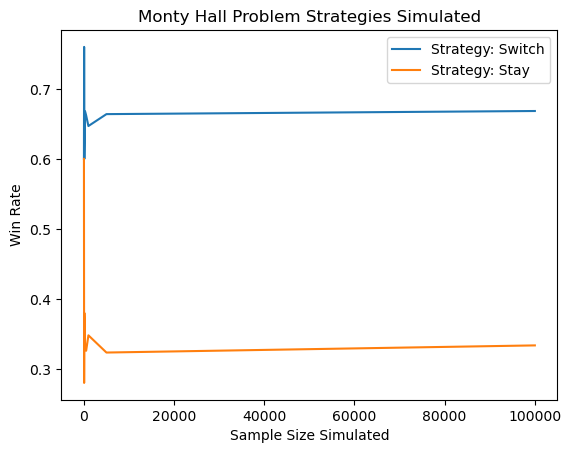

In [131]:
sample_sizes = [10, 50, 100, 250, 500, 1000, 5000, 100000]

switch_results = []
stay_results = []

for size in sample_sizes:
    switch_results.append(monty_hall_sim(size, True))
    stay_results.append(monty_hall_sim(size, False))

plt.plot(sample_sizes, switch_results, label='Strategy: Switch')
plt.plot(sample_sizes, stay_results, label='Strategy: Stay')
plt.legend()
plt.xlabel('Sample Size Simulated')
plt.ylabel('Win Rate')
plt.title('Monty Hall Problem Strategies Simulated')
plt.legend()
plt.show()
    